In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
from __future__ import print_function
from numpy import *
from scipy import *

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import reload
import matplotlib.patches as patches

import netCDF4 as nc
import numpy as np
import scipy as sp

import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

# matplotlib.use('Agg')
# plt.style.use('seaborn-whitegrid')
import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs

from scipy import optimize
import arrow
import gsw
import pandas as pd
import xarray as xr
%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
infil=  pd.read_csv('./P01_with_age.csv')

In [5]:
t_lats = infil['latitude']
t_latval = (t_lats.values)
t_lons = infil['longitude']
t_lonval = (t_lons.values)

# Visualise cruise points

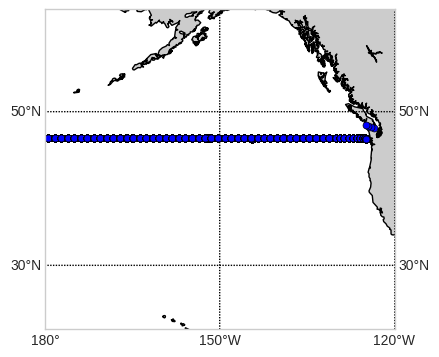

In [6]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# create new figure, axes instances.
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-180.,llcrnrlat=20.,urcrnrlon=-120.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)


lonlat = t_latval; lonlon = t_lonval

m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
x,y = m(lonlon, lonlat)
m.plot(x, y, 'bo', markersize=5)
#m.plot(lonlon, lonlat, color = 'k')
plt.show()

In [7]:
list(infil.columns.values)

sigthet = infil['sigma_theta']
fre_11 = infil['freon_11_age']
fre_12 = infil['freon_12_age']
long = infil['longitude']
sigthet_nearby = sigthet[(long>-145) & (long<0)]
fre_11_nearby = fre_11[(long>-145) & (long<0)]
fre_12_nearby = fre_12[(long>-145) & (long<0)]
# plt.plot(sigthet,fre_11,'r*', label = 'all data - freon 11 ')
# plt.plot(sigthet_nearby,fre_11_nearby,'b*', label = 'long > - 145, - freon 11 ')
# plt.plot(sigthet,fre_12,'ro', label = 'all data - freon 12 ')
# plt.plot(sigthet_nearby,fre_12_nearby,'bo', label = 'long > - 145, - freon 12 ')

# plt.legend(bbox_to_anchor=[0.5, 1])
# plt.title('Freon 11 age vs sigma theta')

In [8]:
# plt.plot(sigthet,fre_11,'r*', label = 'all data - freon 11 ')
# plt.plot(sigthet_nearby,fre_11_nearby,'b*', label = 'long > - 145, - freon 11 ')
# plt.plot(sigthet,fre_12,'ro', label = 'all data - freon 12 ')
# plt.plot(sigthet_nearby,fre_12_nearby,'bo', label = 'long > - 145, - freon 12 ')

# plt.legend(bbox_to_anchor=[0.5, 1])
# plt.xlim([24.0,27])
# plt.ylim([0,250])
# plt.title('Freon 11 age vs sigma theta')

In [9]:
# #plt.plot(sigthet,fre_11,'r*', label = 'all data - freon 11 ')
# plt.plot(sigthet_nearby,fre_11_nearby,'b*', label = 'long > - 145, - freon 11 ')
# #plt.plot(sigthet,fre_12,'ro', label = 'all data - freon 12 ')
# plt.plot(sigthet_nearby,fre_12_nearby,'bo', label = 'long > - 145, - freon 12 ')

# plt.legend(bbox_to_anchor=[0.5, 1])
# plt.xlim([24.0,27])
# plt.ylim([0,250])
# plt.title('Freon age vs sigma theta')

In [10]:
sigthet_120_125 = sigthet[(long>-125) & (long<-120)]
fre_11_120_125 = fre_11[(long>-125) & (long<-120)]
fre_12_120_125 = fre_12[(long>-125) & (long<-120)]

sigthet_125_130 = sigthet[(long>-130) & (long<-125)]
fre_11_125_130 = fre_11[(long>-130) & (long<-125)]
fre_12_125_130 = fre_12[(long>-130) & (long<-125)]

sigthet_130_135 = sigthet[(long>-135) & (long<-130)]
fre_11_130_135 = fre_11[(long>-135) & (long<-130)]
fre_12_130_135 = fre_12[(long>-135) & (long<-130)]

sigthet_135_140 = sigthet[(long>-140) & (long<-135)]
fre_11_135_140 = fre_11[(long>-140) & (long<-135)]
fre_12_135_140 = fre_12[(long>-140) & (long<-135)]


# plt.plot(sigthet_120_125,fre_11_120_125,'k*', label = '(long>-125) & (long<-120), - freon 11 ')
# plt.plot(sigthet_125_130,fre_11_125_130,'b*', label = '(long>-130) & (long<-125), - freon 11 ')
# plt.plot(sigthet_130_135,fre_11_130_135,'r*', label = '(long>-135) & (long<-130), - freon 11 ')
# plt.plot(sigthet_135_140,fre_11_135_140,'g*', label = '(long>-140) & (long<-135), - freon 11 ')
# plt.legend(bbox_to_anchor = [0.7, 1])

In [11]:
# plt.plot(sigthet_120_125,fre_12_120_125,'k*', label = '(long>-125) & (long<-120), - freon 11 ')
# plt.plot(sigthet_125_130,fre_12_125_130,'b*', label = '(long>-130) & (long<-125), - freon 11 ')
# plt.plot(sigthet_130_135,fre_12_130_135,'r*', label = '(long>-135) & (long<-130), - freon 11 ')
# plt.plot(sigthet_135_140,fre_12_135_140,'g*', label = '(long>-140) & (long<-135), - freon 11 ')


In [12]:
sigthet_120_125 = sigthet[(long>-125) & (long<-120) & (sigthet <27)]
fre_11_120_125 = fre_11[(long>-125) & (long<-120) & (sigthet <27)]
fre_12_120_125 = fre_12[(long>-125) & (long<-120) & (sigthet <27)]

sigthet_125_130 = sigthet[(long>-130) & (long<-125) & (sigthet <27)]
fre_11_125_130 = fre_11[(long>-130) & (long<-125) & (sigthet <27)]
fre_12_125_130 = fre_12[(long>-130) & (long<-125) & (sigthet <27)]

sigthet_130_135 = sigthet[(long>-135) & (long<-130) & (sigthet <27)]
fre_11_130_135 = fre_11[(long>-135) & (long<-130) & (sigthet <27)]
fre_12_130_135 = fre_12[(long>-135) & (long<-130) & (sigthet <27)]

sigthet_135_140 = sigthet[(long>-140) & (long<-135) & (sigthet <27)]
fre_11_135_140 = fre_11[(long>-140) & (long<-135) & (sigthet <27)]
fre_12_135_140 = fre_12[(long>-140) & (long<-135) & (sigthet <27)]

In [13]:
# plt.plot(sigthet_120_125,fre_11_120_125,'k*', label = '(long>-125) & (long<-120), - freon 11 ')
# plt.plot(sigthet_125_130,fre_11_125_130,'b*', label = '(long>-130) & (long<-125), - freon 11 ')
# plt.plot(sigthet_130_135,fre_11_130_135,'r*', label = '(long>-135) & (long<-130), - freon 11 ')
# plt.plot(sigthet_135_140,fre_11_135_140,'g*', label = '(long>-140) & (long<-135), - freon 11 ')
# plt.legend()
# plt.title('age vs freon 11 ages')

In [14]:
# plt.plot(sigthet_125_130,fre_11_125_130,'b*', label = '(long>-130) & (long<-125), - freon 11 ')
# plt.plot(sigthet_125_130,fre_12_125_130,'r*', label = '(long>-130) & (long<-125), - freon 11 ')


In [15]:
fre_12_125_130_nn = fre_12_125_130[~isnan(fre_11_125_130) & ~isnan(sigthet_125_130) & ~isnan(fre_12_125_130) ]
fre_11_125_130_nn = fre_11_125_130[~isnan(fre_11_125_130) & ~isnan(sigthet_125_130) & ~isnan(fre_12_125_130) ]
sigthet_125_130_nn = sigthet_125_130[~isnan(fre_11_125_130) & ~isnan(sigthet_125_130) & ~isnan(fre_12_125_130)]

In [16]:
def test_func(x, a, b, c):
    return a * np.exp(-b * (25.15-x)) + c

params, params_covariance = optimize.curve_fit(test_func, sigthet_125_130_nn, fre_11_125_130_nn,
                                               p0=[1, -0.05, -25.15])
params0 = params[0]
params1 = params[1]
params2 = params[2]
print(params0)
print(params1)
print(params2)

pycnal_forfunc_11 = np.arange(22,27,0.01)
pycnal_age_fromfunc_11 = params0 *np.exp(-params1*(25.15-pycnal_forfunc_11))+params2


params, params_covariance = optimize.curve_fit(test_func, sigthet_125_130_nn, fre_12_125_130_nn,
                                               p0=[1, -0.05, -25.15])
params0 = params[0]
params1 = params[1]
params2 = params[2]
print(params0)
print(params1)
print(params2)

pycnal_forfunc_12 = np.arange(22,27,0.01)
pycnal_age_fromfunc_12 = params0 *np.exp(-params1*(25.15-pycnal_forfunc_12))+params2


0.10751130798750012
4.009517044643506
9.854515608368056
0.14147556690680096
3.885986927128071
6.576131233528212


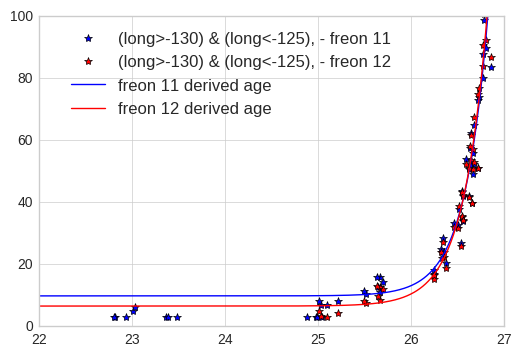

In [17]:
plt.plot(sigthet_125_130,fre_11_125_130,'b*', label = '(long>-130) & (long<-125), - freon 11 ')
plt.plot(sigthet_125_130,fre_12_125_130,'r*', label = '(long>-130) & (long<-125), - freon 12 ')
plt.plot(pycnal_forfunc_11,pycnal_age_fromfunc_11, 'b-', label = 'freon 11 derived age')
plt.plot(pycnal_forfunc_12,pycnal_age_fromfunc_12, 'r-', label = 'freon 12 derived age')
plt.ylim([0,100])
plt.legend(bbox_to_anchor = [0.8, 1])


In [18]:
print('this one')

this one


0.1301889490932413
3.8509914822057825
8.301166081413104


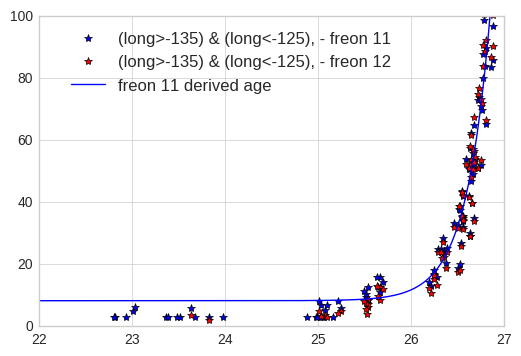

In [19]:
zeta = 25.15
sigthet_125_135 = sigthet[(long>-135) & (long<-125) & (sigthet <27)]
fre_11_125_135 = fre_11[(long>-135) & (long<-125) & (sigthet <27)]
fre_12_125_135 = fre_12[(long>-135) & (long<-125) & (sigthet <27)]

fre_12_125_135_nn = fre_12_125_135[~isnan(fre_11_125_135) & ~isnan(sigthet_125_135) & ~isnan(fre_12_125_135) ]
fre_11_125_135_nn = fre_11_125_135[~isnan(fre_11_125_135) & ~isnan(sigthet_125_135) & ~isnan(fre_12_125_135) ]
sigthet_125_135_nn = sigthet_125_135[~isnan(fre_11_125_135) & ~isnan(sigthet_125_135) & ~isnan(fre_12_125_135)]

def test_func(x, a, b, c):
    return a * np.exp(-b * (zeta-x)) + c

params, params_covariance = optimize.curve_fit(test_func, sigthet_125_135_nn, fre_11_125_135_nn,
                                               p0=[1, -0.05, -25.15])
params0 = params[0]
params1 = params[1]
params2 = params[2]
print(params0)
print(params1)
print(params2)

pycnal_forfunc_11 = np.arange(22,27,0.01)
pycnal_age_fromfunc_11 = params0 *np.exp(-params1*(25.15-pycnal_forfunc_11))+params2

sigthet_125_135 = sigthet[(long>-135) & (long<-125) & (sigthet <27)]
fre_11_125_135 = fre_11[(long>-135) & (long<-125) & (sigthet <27)]
fre_12_125_135 = fre_12[(long>-135) & (long<-125) & (sigthet <27)]

fre_12_125_135_nn = fre_12_125_135[~isnan(fre_11_125_135) & ~isnan(sigthet_125_135) & ~isnan(fre_12_125_135) ]
fre_11_125_135_nn = fre_11_125_135[~isnan(fre_11_125_135) & ~isnan(sigthet_125_135) & ~isnan(fre_12_125_135) ]
sigthet_125_135_nn = sigthet_125_135[~isnan(fre_11_125_135) & ~isnan(sigthet_125_135) & ~isnan(fre_12_125_135)]

# def test_func(x, a, b, c):
#     return a * np.exp(-b * (zeta-x)) + c

# params, params_covariance = optimize.curve_fit(test_func, sigthet_125_135_nn, fre_12_125_135_nn,
#                                                p0=[1, -0.05, -25.15])
# params0 = params[0]
# params1 = params[1]
# params2 = params[2]
# print(params0)
# print(params1)
# print(params2)

plt.plot(sigthet_125_135,fre_11_125_135,'b*', label = '(long>-135) & (long<-125), - freon 11 ')
plt.plot(sigthet_125_135,fre_12_125_135,'r*', label = '(long>-135) & (long<-125), - freon 12 ')
plt.plot(pycnal_forfunc_11,pycnal_age_fromfunc_11, 'b-', label = 'freon 11 derived age')
#plt.plot(pycnal_forfunc_12,pycnal_age_fromfunc_12, 'r-', label = 'freon 12 derived age')
plt.ylim([0,100])
plt.legend(bbox_to_anchor = [0.8, 1])


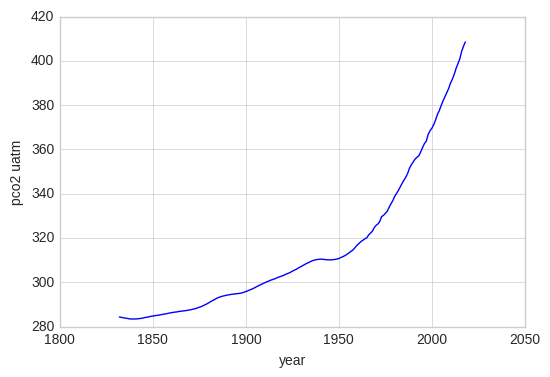

In [20]:
co2_rec = pd.read_csv('lawdome_maunaloa.csv') 
plt.plot(co2_rec['YEAR'],co2_rec['PPMCO2'])
plt.ylabel('pco2 uatm')
plt.xlabel('year')

co2_rec = pd.read_csv('lawdome_maunaloa.csv') 
def co2_from_year(year):
    '''takes a value for a year, converts year to int,
    and finds appropriate co2 values  from pandas lookup table. 
    if year < 1832, value is for year 1832, if year > 2018, value is for year 2018'''
    
    whole_year = int(year)
    
    if whole_year >= 2018:
        whole_year = 2018     
        #print('year > 2018, using value for 2018')
        
    if whole_year <= 1832:
        whole_year = 1832
        #print('year < 1832, using value for 1832')

    match = (co2_rec['YEAR'] == whole_year) 
    atmco2 = co2_rec['PPMCO2'][match]
    t_co2 = atmco2.values[0]
    return t_co2

In [21]:
pycnal_forfunc = 24
pycnal_last_at_surface = 2019 - (params0 *np.exp(-params1*(25.15-pycnal_forfunc))+params2)
print(pycnal_last_at_surface)

2010.6972806730366


In [22]:
pycnal_forfunc_11 =np.arange(24.4,28,0.05)
pycnal_age_fromfunc = params0 *np.exp(-params1*(25.15-pycnal_forfunc_11))+params2
pycnal_last_at_surface = 2019 - (params0 *np.exp(-params1*(25.15-pycnal_forfunc_11))+params2)
pycnal_original_co2 = np.zeros_like(pycnal_last_at_surface)

for i in range(0,len(pycnal_original_co2)):
    ty = pycnal_last_at_surface[i]
    tco2 = co2_from_year(ty)
    pycnal_original_co2[i] = tco2
    
    
pycnal_intrusion = 409 - pycnal_original_co2

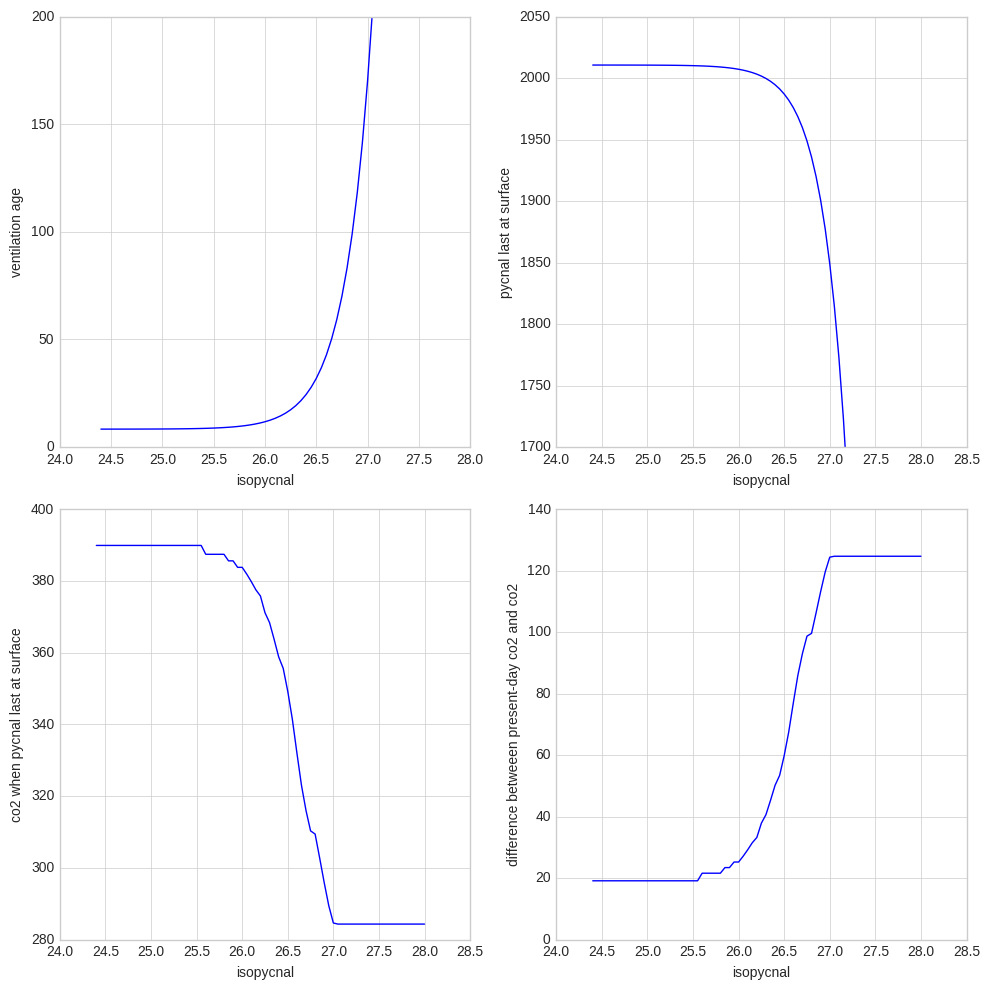

In [23]:
fig = plt.figure(figsize=(10,10))
nop = 4
for i in range(1,nop+1):

    if i == 1:
        ax = fig.add_subplot(2,2,i)
        #ax.plot(pycnal,pycnal_age,'r*', markersize = 15)
        ax.plot(pycnal_forfunc_11,pycnal_age_fromfunc)
        ax.set_xlabel('isopycnal')
        ax.set_ylabel('ventilation age')
        ax.set_xlim([24.0,28.0])
        ax.set_ylim([0,200])
        

    if i == 2:
        ax = fig.add_subplot(2,2,i)
        #ax.plot(pycnal,pycnal_age,'r*', markersize = 15)
        ax.plot(pycnal_forfunc_11,pycnal_last_at_surface)
        #ax.plot(25.654,1832.1497986658724,'g*', markersize = 15)
        ax.set_ylim([1700,2050])
        ax.set_xlabel('isopycnal')
        ax.set_ylabel('pycnal last at surface')
        #ax.set_title('green star = last isopycnal in fxn (25.654)')

    if i == 3:
        ax = fig.add_subplot(2,2,i)
        #ax.plot(pycnal,pycnal_age,'r*', markersize = 15)
        ax.plot(pycnal_forfunc_11,pycnal_original_co2)
        ax.set_xlabel('isopycnal')
        ax.set_ylabel('co2 when pycnal last at surface')


    if i == 4:
        ax = fig.add_subplot(2,2,i)
        #ax.plot(pycnal,pycnal_age,'r*', markersize = 15)
        ax.plot(pycnal_forfunc_11,pycnal_intrusion)
        ax.set_xlabel('isopycnal')
        ax.set_ylabel('difference betweeen present-day co2 and co2')

   
        
plt.tight_layout()

In [24]:
test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m06d01.nc')
zlevels = (test_LO['deptht'][:])
sal = test_LO['vosaline'][0,:,0,:]
temp = test_LO['votemper'][0,:,0,:]
potdens = gsw.sigma0(sal,temp)
potdens_mask = np.copy(potdens)
potdens_mask[potdens>24.4] = 1
potdens_mask[potdens<=24.4] = -1

DIC = test_LO['DIC'][0,:,0,:]
TA = test_LO['TA'][0,:,0,:]

depth_this = np.zeros_like(TA)

for i in range(0,950):
    depth_this[:,i] = zlevels

In [25]:

pycnal_last_at_surface = 2019 - (params0 *np.exp(-params1*(25.15-potdens))+params2)

pycnal_original_co2 = np.zeros_like(pycnal_last_at_surface)
np.shape(pycnal_original_co2)
for i in range(0,40):
    for j in range(0,950):
        ty = pycnal_last_at_surface[i,j]
        tco2 = co2_from_year(ty)
        pycnal_original_co2[i,j] = tco2


pycnal_intrusion = 409 - pycnal_original_co2

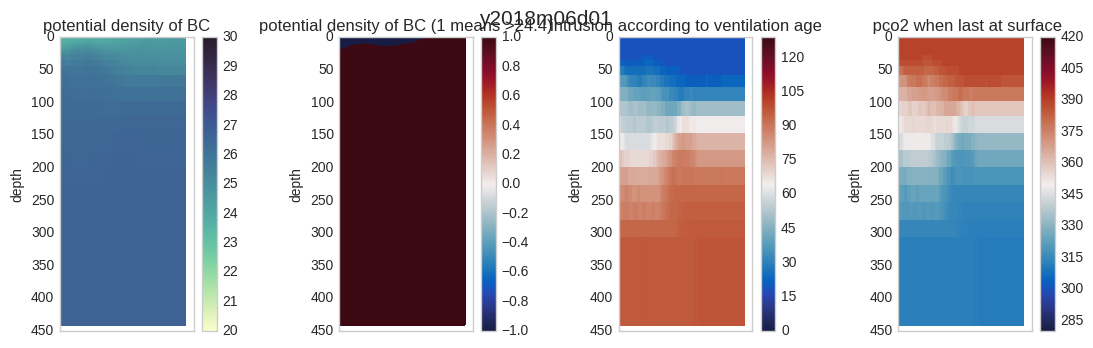

In [26]:
fig = plt.figure(figsize=(11,3.5))
nop = 4
for i in range(1,nop+1):

    if i == 1:
        ax = fig.add_subplot(1,4,i)
        section_slice = np.arange(0, 95)
        sd = (potdens)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,0:95], cmap = tcmap, vmin=20, vmax=30)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('potential density of BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 2:
        ax = fig.add_subplot(1,4,i)
        section_slice = np.arange(0, 95)
        sd = (potdens_mask)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,0:95], cmap = tcmap, vmin=-1, vmax=1)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('potential density of BC (1 means >24.4)') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(1,4,i)
        section_slice = np.arange(0, 95)
        sd = (pycnal_intrusion)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,0:95], cmap = tcmap, vmin=0, vmax=129)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('intrusion according to ventilation age') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])   
        
    if i == 4:
        ax = fig.add_subplot(1,4,i)
        section_slice = np.arange(0, 95)
        sd = (pycnal_original_co2)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,0:95], cmap = tcmap, vmin=280, vmax=420)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title(' pco2 when last at surface') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])    


        
plt.suptitle('y2018m06d01', fontsize = 15)
plt.tight_layout()

In [27]:
def oned_moxy(tsal, ttemp, tdic, tta, pres_atm, depth_this):

    size_box = np.shape(tdic)
    size_0 = size_box[0]
    size_1= size_box[1]


    tsra = np.ravel(tsal)
    ttera = np.ravel(ttemp)
    ttara = np.ravel(tta) * 1e-3
    tdra = np.ravel(tdic) * 1e-3
    tzero = np.zeros_like(tsra)
    tpressure = np.zeros_like(tsra)
    #tdepth = np.zeros_like(tsra)
    tpressure[:] = pres_atm
    tdepth = np.ravel(depth_this)
    tzero = tpressure * 0 
        
    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepth, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pHr = pH.reshape(size_0,size_1)
    OmAr = OmegaA.reshape(size_0,size_1)
    pco2r = pco2.reshape(size_0,size_1)
    
    return pHr, OmAr, pco2r

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

def find_DIC_corresp_to_pco2(tsal, ttemp, tpco2, tta, pres_atm, depth_this):
    
    steps = 10000
    tsal_r = np.zeros([steps])
    tsal_r[:] = tsal
    ttemp_r = np.zeros([steps])
    ttemp_r[:] = ttemp
    tta_r = np.zeros([steps])
    tta_r[:] = tta * 1e-3
    tpres_r = np.zeros([steps])
    tpres_r[:] = pres_atm
    depth_r = np.zeros([steps])
    depth_r[:] = depth_this
    tzero = np.zeros([steps])

    end_d = 2400
    start_d = 600
    intvl = (end_d - start_d)/steps
    tdic_r = np.arange(start_d,end_d-0.1,intvl) * 1e-3
    
    response_tup = mocsy.mvars(temp=ttemp_r, sal=tsal_r, alk=tta_r, dic=tdic_r, 
                       sil=tzero, phos=tzero, patm=tpres_r, depth=depth_r, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup    
    
    diffmat = pco2 - tpco2
    idx, ans = find_nearest( diffmat,0 )
    
    if ans> 2:
        print('Danger, pco2 found >2 uatm from pco2 given')
#     print(idx)
#     print('difference between real pco2 and pco2 from calc. dic: ',ans)
#     print('DIC found this way:', tdic_r[idx]*1e3)
    fin_dic = tdic_r[idx]*1e3
    
    return fin_dic
    


In [28]:
##1) 

test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
zlevels = (test_LO['deptht'][:])
sal = test_LO['vosaline'][0,:,0,:]
temp = test_LO['votemper'][0,:,0,:]
potdens = gsw.sigma0(sal,temp)
potdens_mask = np.copy(potdens)
potdens_mask[potdens>24.4] = 1
potdens_mask[potdens<=24.4] = -1

zlevels = (test_LO['deptht'][:])
sal = test_LO['vosaline'][0,:,0,:]
temp = test_LO['votemper'][0,:,0,:]
DIC = test_LO['DIC'][0,:,0,:]
TA = test_LO['TA'][0,:,0,:]

depth_this = np.zeros_like(TA)

for i in range(0,950):
    depth_this[:,i] = zlevels

pHr, OmAr, pco2r = oned_moxy(sal, temp, DIC, TA, 1, depth_this)

pco2_resh = pco2r.reshape(40,950)


In [29]:
def one_pt_moxy(tsal, ttemp, tdic, tta, pres_atm, depth_this):



    tsra = np.ravel(tsal)
    ttera = np.ravel(ttemp)
    ttara = np.ravel(tta) * 1e-3
    tdra = np.ravel(tdic) * 1e-3
    tzero = np.zeros_like(tsra)
    tpressure = np.zeros_like(tsra)
    #tdepth = np.zeros_like(tsra)
    tpressure[:] = pres_atm
    tdepth = np.ravel(depth_this)
    tzero = tpressure * 0 
        
    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepth, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pHr = pH
    OmAr = OmegaA
    pco2r = pco2
    
    return pHr, OmAr, pco2r

In [30]:
# pycnal_last_at_surface = 2019 - (params0 *np.exp(-params1*(25.15-potdens))+params2)

# pycnal_original_co2 = np.zeros_like(pycnal_last_at_surface)
# np.shape(pycnal_original_co2)
# for i in range(0,40):
#     for j in range(0,950):
#         ty = pycnal_last_at_surface[i,j]
#         tco2 = co2_from_year(ty)
#         pycnal_original_co2[i,j] = tco2


# pycnal_intrusion =  pycnal_original_co2 - 284



In [31]:
## hokay so how does this work
d = 35
DIC_ex = DIC[d,100]
TA_ex = TA[d,100]
sal_ex = sal[d,100]
temp_ex= temp[d,100]
depth_ex = depth_this[d,100] 
potdens_ex = gsw.sigma0(sal_ex,temp_ex)
# print(depth_ex)
# print(DIC_ex)

# print('pco2 of chosen pt at depth ' +str(depth_ex))
# pHr, OmAr, pco2r = one_pt_moxy(sal_ex, temp_ex, DIC_ex, TA_ex, 1, depth_ex)
# print(pco2r)
# print('pco2 of chosen pt at surface')
# pHr, OmAr, pco2r = one_pt_moxy(sal_ex, temp_ex, DIC_ex, TA_ex, 1, 0)
# print(pco2r)

# pco2_resh = pco2r.reshape(40,950)
print('')
print('what is the density of this parcel?')
print(potdens_ex)
print('')
print('when was this parcel last at surface?')
pycnal_last_at_surface = 2019 - (params0 *np.exp(-params1*(25.15-potdens_ex))+params2)
print(pycnal_last_at_surface)
print('')
print('what is the historic_atm_conc_co2 it witnessed at surface?')
print(co2_from_year(int(pycnal_last_at_surface)))
print('')
print('what is the co2 intrusion (atm co2 witnessed - preind_co2 (284))')
co2_intr = co2_from_year(int(pycnal_last_at_surface))-284
print(co2_intr)
print('')
print('what is its calculated *surface* pco2?')
pHr, OmAr, pco2r = one_pt_moxy(sal_ex, temp_ex, DIC_ex, TA_ex, 1, 0)
print(pco2r)
print('')
print('what is its pco2_disequilibrium?')
print('(= observed *surface* pco2 - atm pco2 concentration when last at surface')
pco2_dis = pco2r - co2_from_year(int(pycnal_last_at_surface))
print(pco2_dis)
print('')
print('what is its inferred historic surface pco2? (= historic_atm_conc + pco2_disequilibrium')
hist_co2 = pco2r - co2_from_year(int(pycnal_last_at_surface)) + 284
print(hist_co2)
print('')
print('what is historic co2 + intrusion?')
print(co2_intr + hist_co2)


what is the density of this parcel?
26.51226286739802

when was this parcel last at surface?
1985.9867025973635

what is the historic_atm_conc_co2 it witnessed at surface?
346.12

what is the co2 intrusion (atm co2 witnessed - preind_co2 (284))
62.120000000000005

what is its calculated *surface* pco2?
[1215.5422262]

what is its pco2_disequilibrium?
(= observed *surface* pco2 - atm pco2 concentration when last at surface
[869.4222262]

what is its inferred historic surface pco2? (= historic_atm_conc + pco2_disequilibrium
[1153.4222262]

what is historic co2 + intrusion?
[1215.5422262]


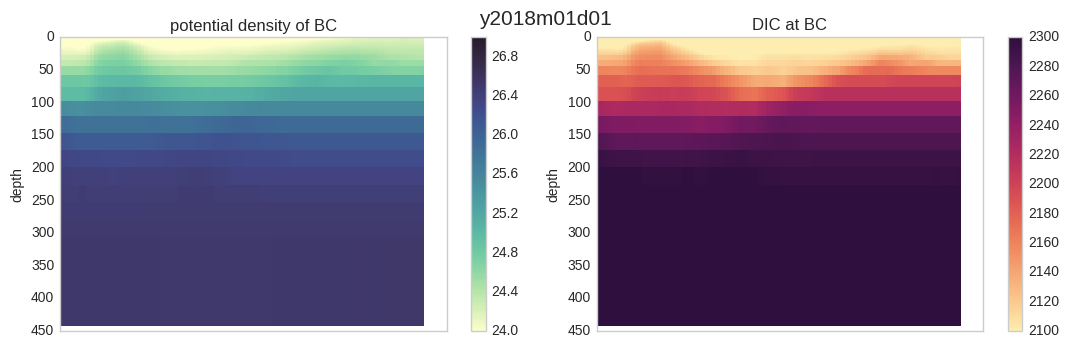

In [32]:
fig = plt.figure(figsize=(11,3.5))
nop = 4
for i in range(1,nop+1):

    if i == 1:
        ax = fig.add_subplot(1,2,i)
        section_slice = np.arange(0, 95)
        sd = (potdens)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,0:95], cmap = tcmap, vmin=24, vmax=27)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('potential density of BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 2:
        ax = fig.add_subplot(1,2,i)
        section_slice = np.arange(0, 95)
        sd = (DIC)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.matter
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,0:95], cmap = tcmap, vmin=2100, vmax=2300)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('DIC at BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])

plt.suptitle('y2018m01d01', fontsize = 15)
plt.tight_layout()

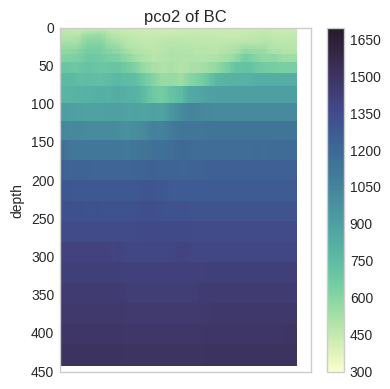

In [33]:
pco2_resh

fig = plt.figure(figsize=(4,4))
nop = 4
for i in range(1,nop+1):

    if i == 1:
        ax = fig.add_subplot(1,1,i)
        section_slice = np.arange(0, 95)
        sd = (pco2_resh)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,0:95], cmap = tcmap, vmin=300, vmax=1700)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('pco2 of BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        

#plt.suptitle('y2018m01d01', fontsize = 15)
plt.tight_layout()

In [34]:
pycnal_last_at_surface = 2019 - (params0 *np.exp(-params1*(25.15-potdens))+params2)

pycnal_original_co2 = np.zeros_like(pycnal_last_at_surface)
np.shape(pycnal_original_co2)
for i in range(0,40):
    for j in range(0,950):
        ty = pycnal_last_at_surface[i,j]
        tco2 = co2_from_year(ty)
        pycnal_original_co2[i,j] = tco2


pycnal_intrusion =  pycnal_original_co2 - 284

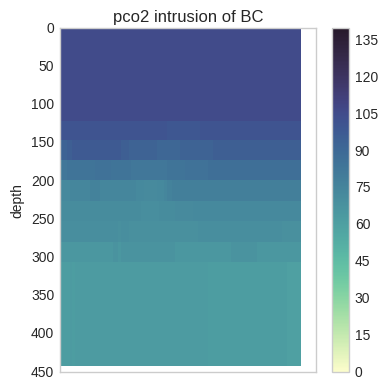

In [35]:
pco2_resh

fig = plt.figure(figsize=(4,4))
nop = 4
for i in range(1,nop+1):

    if i == 1:
        ax = fig.add_subplot(1,1,i)
        section_slice = np.arange(0, 95)
        sd = (pycnal_intrusion)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,0:95], cmap = tcmap, vmin=0, vmax=140)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('pco2 intrusion of BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        

#plt.suptitle('y2018m01d01', fontsize = 15)
plt.tight_layout()

In [36]:
preind_pco2 = pco2_resh - pycnal_intrusion

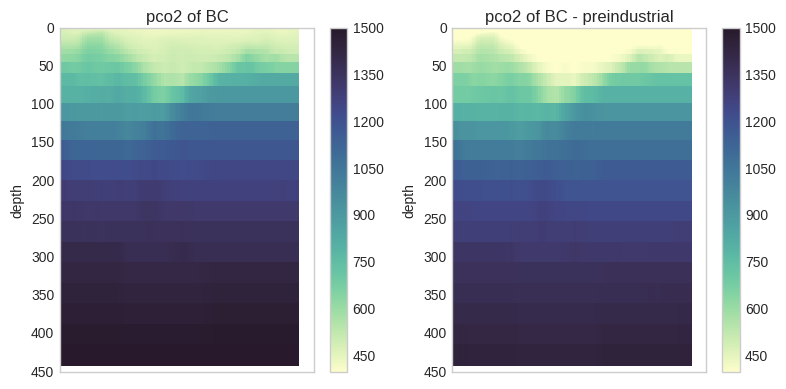

In [37]:
pco2_resh

fig = plt.figure(figsize=(8,4))
nop = 4
for i in range(1,nop+1):

    if i == 1:
        ax = fig.add_subplot(1,2,i)
        section_slice = np.arange(0, 95)
        sd = (pco2_resh)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,0:95], cmap = tcmap, vmin=400, vmax=1500)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('pco2 of BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 2:
        ax = fig.add_subplot(1,2,i)
        section_slice = np.arange(0, 95)
        sd = (preind_pco2)
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.deep
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,0:95], cmap = tcmap, vmin=400, vmax=1500)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('pco2 of BC - preindustrial') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
#plt.suptitle('y2018m01d01', fontsize = 15)
plt.tight_layout()

In [38]:
def preind_dic_ncmaker(startind, endind, year):
#1 open given boundary conditions file and findpco2 and potential density 
    daymon = [31,28,31,30,31,30,31,31,30,31,30,31]
    daymon_LY = [31,29,31,30,31,30,31,31,30,31,30,31]

    year_ar = []
    noday = 365
    if year == 2016:
        t_daymon = daymon_LY
        noday = 366
    else:
        t_daymon = daymon

    for m in range(1,13):
        if m>=10:
            tm = str(m)
        if m<10:
            tm = '0' + str(m)
        print(tm)
        for d in range(1,t_daymon[m-1]+1):
            if d>=10:
                td = str(d)
            if d<10:
                td = '0' + str(d)

            tstr = 'y' + str(year) + 'm' + tm + 'd' + td
            year_ar.append(tstr)
                            
    for ind in range(startind,endind):

        print(year_ar[ind])
        test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_' + year_ar[ind] +'.nc')        
        dsin = test_LO
        #output file
        ncname = './preind_DIC/PREIND_BC_v201905_AndrewAge_' + year_ar[ind] +'.nc'
        print(ncname)
        dsout = nc.Dataset(ncname, "w", format="NETCDF4")
        #Copy dimensions
        for dname, the_dim in dsin.dimensions.items():
            print(dname)
            print(len(the_dim))
            dsout.createDimension(dname, len(the_dim) if not the_dim.isunlimited() else None)
        # Copy variables
        for v_name, varin in dsin.variables.items():
            print(v_name)
            if (v_name != 'DIC'):
                outVar = dsout.createVariable(v_name, varin.datatype, varin.dimensions)
            # Copy variable attributes
                outVar.setncatts({k: varin.getncattr(k) for k in varin.ncattrs()})

                outVar[:] = varin[:]
            if (v_name == 'DIC'):
                print('not copying DIC!')
        w = nc.Dataset('./preind_DIC/LO_corrected_'+ year_ar[ind] +'_preind_DIC.nc')
        piDIC = w['preindustrial_DIC']['preind_dic']
        t_DIC = np.zeros([1, 40, 1, 950])
        t_DIC[0,:,0,:] = piDIC[:,:]
        
        DIC = dsout.createVariable('DIC',np.float32,('time_counter','deptht','yb','xbT'))
        DIC[:] = t_DIC
        
        dsout.close()

In [41]:
# startind = 2
# endind = 3
# year = 2015
# preind_dic_ncmaker(startind, endind, year)

01
02
03
04
05
06
07
08
09
10
11
12
y2015m01d03
./preind_DIC/PREIND_BC_v201905_AndrewAge_y2015m01d03.nc


OSError: Permission denied

In [ ]:
w = nc.Dataset('./PREIND_BC_v201905_AndrewAge_y2015m01d01.nc')

In [ ]:
print(w['DIC'])

In [ ]:
print(DIC)

In [ ]:
# For a given isopycnal (say 26):





# (1) estimate AOU on 26 (assoc with water parcel with DIC_{w,2019,26,jdf})

#                        = f(O2_{w,2019,26,jdf},S_{w,2019,26,jdf},T_{w,2019,26,jdf},
#  P_{w,2019,26,jdf})

# (P is there to determine T when last at surface - I'll call it preT next)





# (2) estimate preformed DIC on 26 when last at surface (say 16 years ago or in 2003): 





#  preDIC_{w,2003,26} = DIC_{w,2019,26,jdf} - AOU_{w,2019,26,jdf}





# {AOU may be about 130 umol/kg or so in this e.g.  - we are taking away the AOU because the water hasn't received the organic rain yet - here I am assuming that one
#  unit of AOU means one unit of DIC and it will be close but we should check Gruber et al. 2006}





# (3)  estimate preformed PCO2

# prePCO2_{w,jdf,26} = f(preDIC_{w,2003,26},TA_{w,2019,26,jdf},S_{w,2019,26,jdf},preT_{w,2019,26,jdf})





# (4) estimate disequilibrium PCO2 when last at surface

# diseqPCO2 = prePCO2_{w,jdf,26} - PCO2_a,2003





# {expect diseqPCO2 may be about 0-30 uatm but not 300uatm or more}





# (5) estimate preindustrial preformed DIC

# preDIC_PI = f( (PCO2_PI + diseqPCO2), TA_{w,2019,26,jdf},S_{w,2019,26,jdf},preT_{w,2019,26,jdf})





# (6) estimate deltaDIC - or DIC intrusion (the amount you need to subtract from the DIC in present day boundary condition to get your PI boundary condition)

# deltaDIC_26 = ( preDIC_{w,2003,26}   -   preDIC_PI )
